In [2]:
# setting up packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

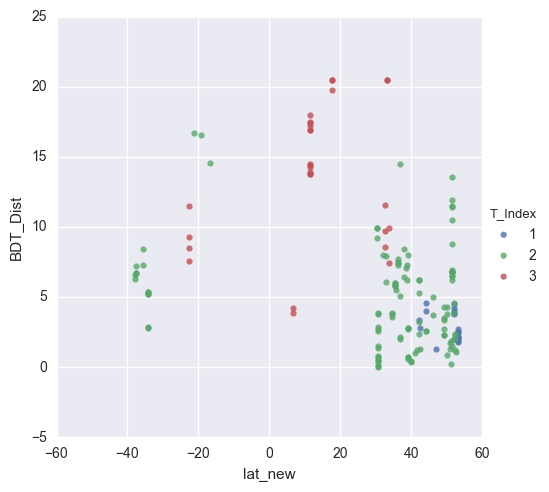

In [23]:
# bringing in dataset and the key into both pandas and numpy
data = pd.read_csv('419_Database.csv', encoding = "ISO-8859-1")

initialdf = data[['BDT_Dist', 'lat_new', 'T_Index']].copy()
initialdf['lat_new'].astype(str).astype(float)
x = initialdf['lat_new']
y = initialdf['BDT_Dist']


initialdf

sns.lmplot("lat_new", "BDT_Dist", hue="T_Index", data=initialdf, fit_reg=False)

#plt.scatter(x,y)



#data.drop(['Author', 'Year', 'Title', 'Journal'], axis = 1, inplace = True)
#data.head
#data.isnull().sum()
#sns.set_style('ticks')
#initialscatter = sns.FacetGrid('lat_new', 'BDT.C', data = dfinsects, hue = 'Species')